## Lab 12

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Initialize Q-table
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.001
epsilon_min = 0.01

# Training parameters
n_episodes = 10000
max_steps = 99

# Tracking variables
episode_rewards = []
episode_steps = []

# Training loop
for episode in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0
    
    for step in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit
        
        # Take action
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        # Q-learning update
        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * Q[next_state, best_next_action] - Q[state, action]
        )
        
        # Update state and reward
        state = next_state
        total_reward += reward
        
        # End episode if terminated
        if terminated or truncated:
            break
    
    # Decay epsilon
    epsilon = max(epsilon_min, epsilon - epsilon_decay)
    
    # Track episode statistics
    episode_rewards.append(total_reward)
    episode_steps.append(step + 1)

# Evaluate the learned policy
eval_episodes = 100
total_rewards = []

for _ in range(eval_episodes):
    state, _ = env.reset()
    total_reward = 0
    terminated = False
    truncated = False
    
    while not (terminated or truncated):
        action = np.argmax(Q[state])
        state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
    
    total_rewards.append(total_reward)

print(f"Average Reward during Evaluation: {np.mean(total_rewards):.2f}")
print(f"Standard Deviation of Rewards: {np.std(total_rewards):.2f}")

# Optional: Visualize a few episodes
env = gym.make('Taxi-v3', render_mode='human')
for _ in range(3):
    state, _ = env.reset()
    terminated = False
    truncated = False
    
    while not (terminated or truncated):
        action = np.argmax(Q[state])
        state, reward, terminated, truncated, _ = env.step(action)
        env.render()

env.close()

# Save the Q-table
np.save('taxi_q_table.npy', Q)
print("Q-table saved to 'taxi_q_table.npy'")

Average Reward during Evaluation: 7.62
Standard Deviation of Rewards: 2.63
Q-table saved to 'taxi_q_table.npy'


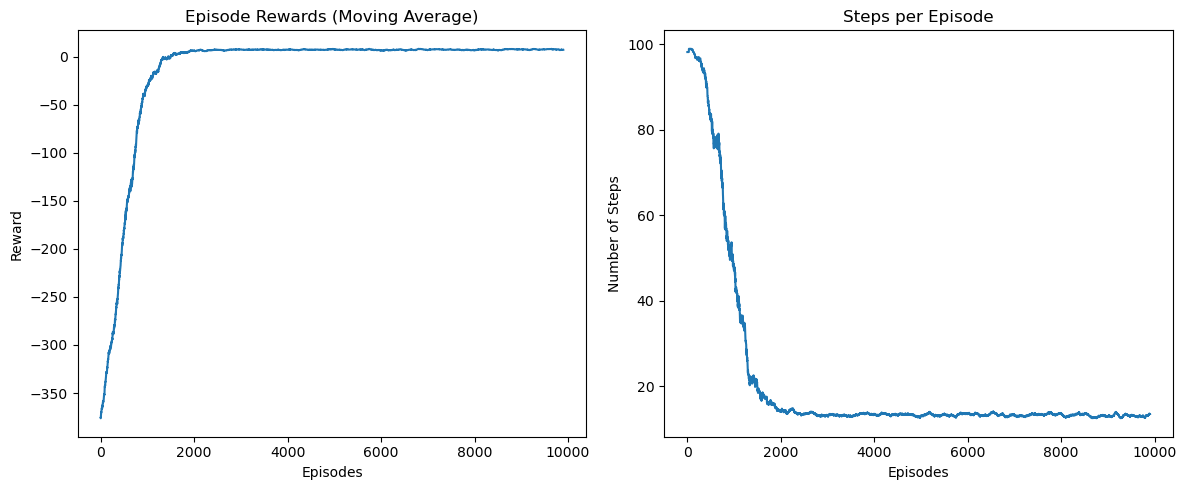

In [6]:
# Plotting results
plt.figure(figsize=(12, 5))

# Plot Rewards
plt.subplot(1, 2, 1)
plt.plot(np.convolve(episode_rewards, np.ones(100)/100, mode='valid'))
plt.title('Episode Rewards (Moving Average)')
plt.xlabel('Episodes')
plt.ylabel('Reward')

# Plot Steps per Episode
plt.subplot(1, 2, 2)
plt.plot(np.convolve(episode_steps, np.ones(100)/100, mode='valid'))
plt.title('Steps per Episode')
plt.xlabel('Episodes')
plt.ylabel('Number of Steps')

plt.tight_layout()